# Lab 8 - HomeTask, Cat Vs Dog Neural Network Model
In this task we are to implement a neural network that would help in classifying an image as either a cat or a dog.
<hr></hr>

1) Name: Syed Muhammad Ashhar Shah
2) Reg: 2020478

Dataset From: https://www.kaggle.com/datasets/tongpython/cat-and-dog

### Required Libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random as rand
from tensorflow.keras import models, layers
import requests
from PIL import Image

2023-06-25 23:26:06.858828: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-25 23:26:10.148361: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-25 23:26:14.162870: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Setting Path and Image Size

In [10]:
# directory path where the images of cats and dogs is stored
catpath = "/home/ashhar/Desktop/CNN_on_FPGA/Ashhar/Cat_And_Dog_CNN/dataset/cats"
dogpath = "/home/ashhar/Desktop/CNN_on_FPGA/Ashhar/Cat_And_Dog_CNN/dataset/dogs"
catguess = '0'
dogguess = '1'

#print(os.listdir(dogpath))

# values for the width and height of a single image
img_resolution = [100,100]

### Obtaining The Images as Training Data
Appending pictures to an list object so that they can be used to train the neural network

In [11]:
trainData = []
maxlen = 5000

# looping over all cat images in the directory
for catImg in os.listdir(catpath):
    # getting the path of a single image
    img = os.path.join(catpath,catImg)
    # resizing and displaying the image
    imgarr = cv2.imread(img)
    imgarr = cv2.resize(imgarr, (img_resolution[0], img_resolution[1]))
    trainData.append([imgarr, '0'])
    if(len(trainData) == maxlen/2):
        break
        
# looping over all cat images in the directory
for dogImg in os.listdir(dogpath):
    # getting the path of a single image
    img = os.path.join(dogpath,dogImg)
    # resizing and displaying the image
    imgarr = cv2.imread(img)
    imgarr = cv2.resize(imgarr, (img_resolution[0], img_resolution[1]))
    trainData.append([imgarr, '1'])
    if(len(trainData) == maxlen):
        break

In [12]:
# shuffling the list so that we dont have a continous sequence of the two catagories
rand.shuffle(trainData)

In [13]:
# splitting the data into x and y for training the network
xtrain = []
ytrain = []
# loop all images in data
for img in trainData:
    xtrain.append(img[0]) # add the image to x
    ytrain.append(int(img[1])) # add the result(cat/dog) to y

# defining our test set for measuring how accurate is the model
xtest = xtrain[4500:5000]
ytest = ytrain[4500:5000]
xtrain = xtrain[:4500]
ytrain = ytrain[:4500]

# convert to a numpy array
xtrain = np.array(xtrain) 
ytrain = np.array(ytrain)
xtest = np.array(xtest) 
ytest = np.array(ytest)

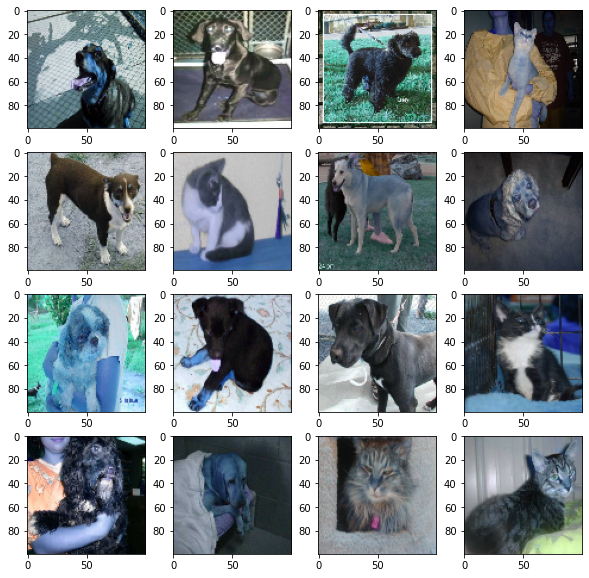

In [14]:
# displaying the first 16 images in our training data
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4, i+1)
    plt.imshow(xtrain[i])

### Data Validation

In [15]:
# applying feature scaling (0-1)
xtrain = xtrain / 255
xtest = xtest/255
#print(xtrain)

In [16]:
""" Result Should Be Like: 
        X Shape: (<Number Of Images>, <Widht Per Image>, <Height Per Image>, <Color Bands> 
        Y Shape: (<Number Of Images>,)
"""

print("X Train Shape: " + str(xtrain.shape))
print("Y Train Shape:" + str(ytrain.shape))
print("X Test Shape: " + str(xtest.shape))
print("Y Test Shape:" + str(ytest.shape))

X Train Shape: (4500, 100, 100, 3)
Y Train Shape:(4500,)
X Test Shape: (500, 100, 100, 3)
Y Test Shape:(500,)


### Defining Our Image Classifier Neural Network Model

In [17]:
model = models.Sequential()

# first conv layer, 64 neurons, (3x3) shows the feature detector matrix, result would be a feature map
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (100,100,3)))
# hidden maxpooling layer, (2x2) shows the pooling matrix, converts feature map to a smaller image
model.add(layers.MaxPooling2D((2,2)))

# again get a new feature map and apply max pooling to it
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

# the final convulutional layer to get all importance features of an image
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
# now we flatten the final feature map and obtain a full convolution map as a flatten 1D array
model.add(layers.Flatten())

# now we pass this into the neural network layers
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))

# output layer, 2 neurons because we have two catagories, softmax because we add all values to get a probabilty(0-1)
model.add(layers.Dense(2, activation = 'softmax'))

# now we compile the model, assign weights etc.
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

### Training The Neural Network

In [18]:
history = model.fit(xtrain, ytrain, epochs = 5, validation_data = (xtest, ytest))

2023-06-25 23:30:13.136190: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 540000000 exceeds 10% of free system memory.


Epoch 1/5
141/141 [==============================] - 73s 498ms/step - loss: 0.6964 - accuracy: 0.5249 - val_loss: 0.6950 - val_accuracy: 0.4820
Epoch 2/5
141/141 [==============================] - 69s 488ms/step - loss: 0.6910 - accuracy: 0.5256 - val_loss: 0.7301 - val_accuracy: 0.5160
Epoch 3/5
141/141 [==============================] - 69s 489ms/step - loss: 0.6739 - accuracy: 0.5736 - val_loss: 0.6588 - val_accuracy: 0.6080
Epoch 4/5
141/141 [==============================] - 69s 490ms/step - loss: 0.6157 - accuracy: 0.6693 - val_loss: 0.6242 - val_accuracy: 0.6460
Epoch 5/5
141/141 [==============================] - 71s 501ms/step - loss: 0.5642 - accuracy: 0.7031 - val_loss: 0.6158 - val_accuracy: 0.6700


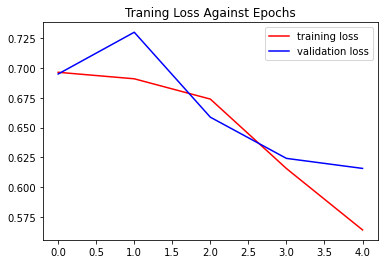

In [19]:
plt.plot(history.history['loss'], color='red', label='training loss')
plt.plot(history.history['val_loss'], color='blue', label='validation loss')
plt.legend()
plt.title('Traning Loss Against Epochs')
plt.show()

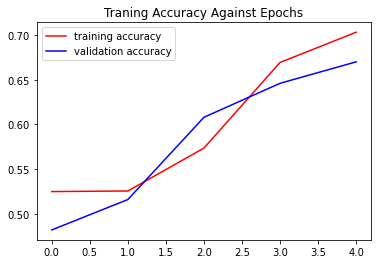

In [20]:
plt.plot(history.history['accuracy'], color='red', label = 'training accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label = 'validation accuracy')
plt.legend()
plt.title('Traning Accuracy Against Epochs')
plt.show()

### Testing The Neural Network

In [21]:
# obtaining a cat and dog image from the internet
catImg = Image.open(requests.get("https://media-cldnry.s-nbcnews.com/image/upload/t_fit-1240w,f_auto,q_auto:best/rockcms/2022-08/220805-domestic-cat-mjf-1540-382ba2.jpg", stream=True).raw)
dogImg = Image.open(requests.get("https://cdn.pixabay.com/photo/2016/02/19/15/46/labrador-retriever-1210559__480.jpg", stream=True).raw)

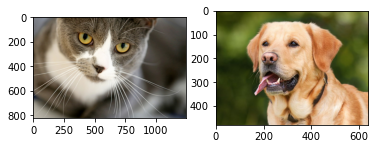

In [22]:
# converting images to an numpy array and resizing the images
catImg = np.array(catImg)
catImg = catImg/255
dogImg = np.array(dogImg)
dogImg = dogImg/255

# plotting the two images
plt.subplot(1,2, 1)
plt.imshow(catImg)
plt.subplot(1,2, 2)
plt.imshow(dogImg)

catImg = cv2.resize(catImg, (img_resolution[0], img_resolution[1]))
dogImg = cv2.resize(dogImg, (img_resolution[0], img_resolution[1]))

In [23]:
# making a single list to be passed to the neural netowrk
predictionArr = []
predictionArr.append(catImg)
predictionArr.append(dogImg)
predictionArr = np.array(predictionArr)

In [24]:
# making sure the predictions are in correct format
predictionArr.shape

(2, 100, 100, 3)

In [25]:
# using the model to classify the two images
Prediction = model.predict(predictionArr)

1/1 [==============================] - 0s 132ms/step


In [26]:
# displaying the output from the neural network
print("Cat = 0, Dog = 1", end = "\n\n")
print("For Cat Image: " + str(np.argmax(Prediction[0])))
print("For Dog Image: " + str(np.argmax(Prediction[1])))

Cat = 0, Dog = 1

For Cat Image: 0
For Dog Image: 1


### Single Image

In [37]:
# obtaining a image from the internet
toPred = Image.open(requests.get("https://thumbs.dreamstime.com/b/dog-golden-retriever-683752.jpg", stream=True).raw)

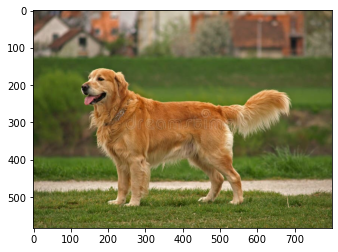

In [38]:
toPred = np.array(toPred)
plt.imshow(toPred)
toPred = toPred/255
toPred = cv2.resize(toPred, (img_resolution[0], img_resolution[1]))

In [39]:
toPred.shape
import tensorflow as tf
new_image = tf.expand_dims(toPred,0)
new_image.shape

TensorShape([1, 100, 100, 3])

In [40]:
pred = model.predict(new_image)

1/1 [==============================] - 0s 41ms/step


In [41]:
print("Cat = 0, Dog = 1", end = "\n\n")
print("For Image: " + str(np.argmax(pred[0])))

Cat = 0, Dog = 1

For Image: 0
